In [239]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from engaged.core import AzurePipeline as AP

import sys, os
sys.path.append('/Users/Michael/projects/engage/engaged_hackathon/')
from engaged.features import features, frequency

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
meta = {'read_wav': {'in_filename': '../../../engaged_hackathon_data/features/night.wav'},
        'save': {'out_filename': 'night.csv'},
        'gen_spectrogram': {
            'nfft': 1024,
            'window_width': 0.03,
            'overlap': 0.01
            },
        'data': {'sampling_rate': None}
        }

Using default for  HPF
Using default for  LPF
Using default for  window_type


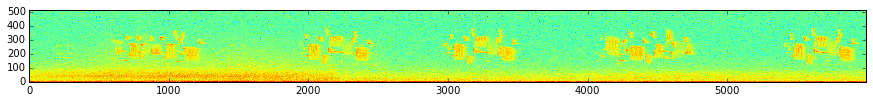

In [104]:
from scipy.io import wavfile
import pandas as pd
from engaged.features import frequency

sr, wav = wavfile.read('../../../engaged_hackathon_data/features/day.wav')

# setting up the metadata and the pipeline object
ap = AP.AzurePipeline(meta)
ap.df = pd.DataFrame(wav)
ap.meta = ap.meta.set_value('sampling_rate', 'data', sr)

# running the spectogram function
ap.apply(frequency.spectrogram)

# extracting and plotting the spectogram
spectro = ap.df.as_matrix()
plt.figure(figsize=(15, 2))
plt.imshow(spectro)
plt.gca().invert_yaxis()

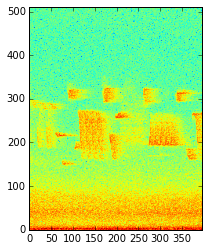

In [105]:
# now extract a single sound from the time domain
sound_blob = spectro[:, 600:(600+396)]
plt.imshow(sound_blob)
plt.gca().invert_yaxis()

In [127]:
# now compute these features on each wav file
import csv
base_path = '/Users/Michael/projects/engage/engaged_hackathon_data/cropped_audio/'
filelist = csv.reader(open(base_path + 'below12kHz_cropped_label.txt'))

X, Y = [], []

fout = open(base_path + '../mf_simple_features_2.csv', 'w')

for count, f in enumerate(filelist):
    wavpath, start_time, wav_class, _ = f
    
    # load in sound file
    sr, wav = wavfile.read(base_path + wavpath)
    
    # convert to spectogram    
    ap = AP.AzurePipeline(meta)
    ap.df = pd.DataFrame(wav)
    ap.meta = ap.meta.set_value('sampling_rate', 'data', sr)
    ap.apply(frequency.spectrogram)
    spec = ap.df.as_matrix()
    
    # compute features
    feature_vector = features.spec_features(spec)
        
    # write to the csv file
    fout.write(wavpath + ',' + 'start_time' + ',' + wav_class + ',')
    
    for feat in feature_vector:
        fout.write('%0.4g,' % feat)
        
    fout.write('\n')
    
    # add to an overall feature
    Y.append(wav_class)
    X.append(feature_vector)

fout.close()


396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
229
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
392
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
396
335
226
337
369
396
396
396
396
396
396
396
396
396
396
396
396


In [256]:
# loading Alison's features
bi_below_12 = csv.reader(open('../../../engaged_hackathon_data/BI_below12kHz.csv'))
feats = {}
for line in bi_below_12:
    feats[line[0]] = float(line[-2])

# must be careful to preserve ordering...
feat_list = []
filelist = csv.reader(open(base_path + 'below12kHz_cropped_label.txt'))
for count, f in enumerate(filelist):
    feat_list.append(feats[f[0]])
    
alison_features = np.array(feat_list)
#  uses 0 ceplifter and 0 preempth, 13 numcep

In [308]:
# computing mfcc features
from features import mfcc

filelist = csv.reader(open(base_path + 'below12kHz_cropped_label.txt'))

mfccs = []

for count, f in enumerate(filelist):
    wavpath, start_time, wav_class, _ = f
    
    # load in sound file
    sr, wav = wavfile.read(base_path + wavpath)
    
    mfcc_feats = mfcc(wav, sr, ceplifter=0, preemph=0, numcep=13)

    all_feats = [mfcc_feats.mean(0), mfcc_feats.var(0), mfcc_feats.max(0)]
    
    mfccs.append(np.hstack(all_feats))
    
    if count % 100 == 0:
        print count
    
all_mfccs_np = np.vstack(mfccs)
print all_mfccs_np.shape
    

# plt.imshow(mfcc_feats.T)

# plt.figure()
# plt.plot(mfcc_feats.mean(0))
# plt.plot(mfcc_feats.max(0))
# plt.plot(mfcc_feats.var(0))



0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
(8765, 39)


In [253]:
# create list/dict for converting number to text labels and v.v.
num_to_label = list(set(Y))
label_to_num = {}

for count, wc in enumerate(num_to_label):
    label_to_num[wc] = count

In [254]:
# print class counts
counts = {}
for y in Y_np:
    if y in counts:
        counts[y] += 1
    else:
        counts[y] = 1

for clas, count in counts.iteritems():
    print str(unique_classes[clas]).ljust(30) + str(count)

 StarttheCar                  1
 Braking                      678
 dog bark                     58
 footsteps                    13
 wing beats                   66
 metal                        29
 applause                     1
 bat                          48
 Bus emitting                 18
 grey squirrel                11
 Mix traffic                  1505
 voices                       329
 unknown sound                240
 mix traffic                  40
 bells                        1
 airplane                     63
 siren                        7
 fox                          17
 mower                        12
 Horn                         1
 beep                         55
 electrical                   235
 music                        3
 anthropogenic unknown        159
 bird                         4798
 braking                      10
 coughing                     7
 invertebrate                 7
 rain                         341
 whistle                      12


In [309]:
# convert the features and labels to suitable types
X_np = np.hstack((np.vstack(X), alison_features[:, None], all_mfccs_np))
# X_np = np.vstack(X)
print X_np.shape

Y_np = np.array([label_to_num[y] for y in Y])

print np.bincount(Y_np)

(8765, 160)
[   1  678   58   13   66   29    1   48   18   11 1505  329  240   40    1
   63    7   17   12    1   55  235    3  159 4798   10    7    7  341   12]


In [326]:
new_counts = {}
max_count = 50

new_X, new_Y = [], []

for x, y in zip(X_np, Y_np):
    if y not in new_counts:
        new_counts[y] = 1
    else:
        new_counts[y] += 1

    if new_counts[y] < max_count:
        new_X.append(x)
        new_Y.append(x)
        
new_X_np = np.vstack(new_X)
new_Y_np = np.vstack(new_Y)
print new_X_np.shape
print new_Y_np.shape

(826, 160)
(826, 160)


In [327]:
# try doing train/test on this data
from sklearn.cross_validation import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
     new_X_np, new_Y_np, test_size=0.25, random_state=42)

print X_train.shape, X_test.shape

(619, 160) (207, 160)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=35)
rf.fit(X_train, Y_train)

Y_pred = rf.predict(X_test)

print np.bincount(Y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix([num_to_label[y] for y in Y_test], 
                      [num_to_label[y] for y in Y_pred],
                     num_to_label)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
#     plt.colorbar()
    tick_marks = np.arange(len(unique_classes))
    plt.xticks(tick_marks, num_to_label, rotation=45)
    plt.yticks(tick_marks, num_to_label)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plt.figure(figsize=(15, 15))
plot_confusion_matrix(cm_normalized);

In [ ]:
import sklearn.metrics
acc = sklearn.metrics.accuracy_score(Y_pred, Y_test)
print acc

# print label_to_num
stupid = [label_to_num[' bird'] for y in Y_pred]
acc = sklearn.metrics.accuracy_score(stupid, Y_test)
print acc

# print sklearn.metrics.average_precision_score(Y_pred, Y_test)
# for simple first pass of features:
# acc = 0.583
# with alison_features
# acc = 0.595
# with mfcc
# acc = 0.682

# new testing/testing set


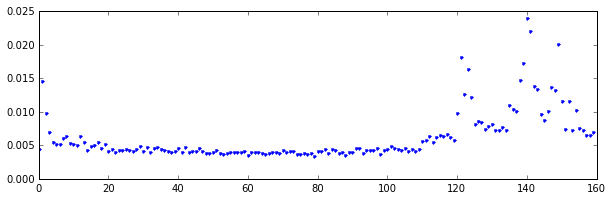

In [315]:
plt.figure(figsize=(10, 3))
plt.plot(rf.feature_importances_, '.')

 StarttheCar                  1
 Braking                      678
 dog bark                     58
 footsteps                    13
 wing beats                   66
 metal                        29
 applause                     1
 bat                          48
 Bus emitting                 18
 grey squirrel                11
 Mix traffic                  1505
 voices                       329
 unknown sound                240
 mix traffic                  40
 bells                        1
 airplane                     63
 siren                        7
 fox                          17
 mower                        12
 Horn                         1
 beep                         55
 electrical                   235
 music                        3
 anthropogenic unknown        159
 bird                         4798
 braking                      10
 coughing                     7
 invertebrate                 7
 rain                         341
 whistle                      12
